In [2]:
%run "../../../PyUtils/common.ipynb"
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcess
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

#Balances the classes in the dataframe at the desired index by duplicating entries for that index at random
#
#@param dataFrame - The dataFrame to add duplicates to
#@param index - The index that contains the class
def BalanceClassesWithDuplicates(dataFrame, index):
    newDF = dataFrame
    classes = dataFrame[index].unique()
    print("classes: [" + ''.join(str(e)+',' for e in classes)+']')
    numberOfClasses = len(dataFrame[index].unique())
    print("Number of Classes:" + str(numberOfClasses))
    
    sizeOfClasses=[]
    
    for aClass in classes:
        sizeOfClasses.append(len(dataFrame.values[dataFrame[index].values == aClass]))
    
    print("Size of Classes: [" + ''.join(str(e)+', ' for e in sizeOfClasses)+']')
    sizeOfLargestClass = max(sizeOfClasses)
    print("Size of Largest Class: " + str(sizeOfLargestClass))
    amountToAddToEachClass = []
    
    for classSize in sizeOfClasses:
        amountToAddToEachClass.append(sizeOfLargestClass - classSize)
        
    print("Amount to Add to Each Class: [" + ''.join(str(e)+', ' for e in amountToAddToEachClass)+']')
    
    k=0
    for amount in amountToAddToEachClass:
        for i in range(0,amount):
           newDF = newDF.append(dataFrame[dataFrame[index].values == classes[k]].sample(n=1, replace=True))
        
        k += 1
    
    
    return newDF;
    
#Balances the classes in the dataframe at the desired index by removing entries at random from the extra 
#represented classes
#
#@param dataFrame - The dataFrame to add duplicates to
#@param index - The index that contains the class
#def BalanceClassesRemoveExtras(dataFrame, index):


patient = "kuky"
ampm = "pm"
file = "http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20calculated_jlee%20WHERE%20ampm=%27"+ampm+"%27%20AND%20pname=%27"+patient+"%27%20ORDER%20BY%20date,%20time"

predictQuantile=True
lowerPercent = 0.20
upperPercent = 0.80

fileName = file;

dfOriginal = LoadDataSet(fileName, checkForDateTime=False);
#displayDFs (dfOriginal, maxrows=3 )
#for c in dfOriginal.columns: print (c,  end=', ')
dfOriginal

<IPython.core.display.Javascript object>

,pname,date,ampm,time,pef,pef_zone,tm_window,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,temperature_diff,airpressure_diff,precipitation_diff
0,kuky,2014-11-22,pm,23:31:00,409,Y,24.000,0.005,0.500,0.022,0.032,95.000,0.083,9.452,0.239,0.579,1642.117,0.003,0.394,0.010,0.024,68.422,6.600,0.100,0.000,100.000,9.700,6.500,1021.700,1025.900,4.800,10.700,1021.700,100.000,6.600,1018.900,71.000,4.100,2.800,29.000
1,kuky,2014-11-23,pm,22:10:00,406,Y,22.650,0.004,0.600,0.021,0.030,112.000,0.070,10.542,0.177,0.494,1821.850,0.003,0.465,0.008,0.022,80.435,9.000,0.000,0.000,83.000,9.500,6.200,1020.000,1024.200,8.000,11.700,1023.800,100.000,4.800,1020.000,67.000,6.900,3.800,33.000
2,kuky,2014-11-24,pm,23:31:00,430,Y,25.350,0.004,0.700,0.006,0.035,155.000,0.095,15.210,0.093,0.672,2795.300,0.004,0.600,0.004,0.027,110.268,6.900,0.400,0.000,83.000,8.200,4.200,1014.100,1018.300,5.900,12.300,1020.000,94.000,6.900,1014.100,42.000,5.400,5.900,52.000
3,kuky,2014-11-25,pm,23:31:00,457,Y,24.000,0.006,0.900,0.033,0.030,156.000,0.080,11.045,0.355,0.427,1452.933,0.003,0.460,0.015,0.018,60.539,9.900,2.700,90.000,59.000,7.200,2.200,1013.700,1017.800,7.300,14.400,1015.000,96.000,4.000,1012.600,46.000,10.400,2.400,50.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,kuky,2016-01-30,pm,23:31:00,440,Y,23.667,0.013,1.000,0.033,0.063,85.000,0.077,13.027,0.323,0.741,993.533,0.003,0.550,0.014,0.031,41.980,-1.000,1.900,270.000,64.000,3.600,-6.900,1023.600,1028.000,-1.400,6.700,1023.600,98.000,-4.000,1020.600,49.000,10.700,3.000,49.000
435,kuky,2016-01-31,pm,23:11:00,448,Y,23.667,0.010,0.400,0.041,0.025,56.000,0.076,7.748,0.670,0.301,829.483,0.003,0.327,0.028,0.013,35.049,-4.400,2.900,320.000,36.000,1.600,-17.200,1026.500,1030.900,-4.700,0.400,1026.500,68.000,-4.700,1023.600,31.000,5.100,2.900,37.000
436,kuky,2016-02-01,pm,23:44:00,458,Y,24.550,0.024,0.600,0.040,0.046,78.000,0.150,8.738,0.508,0.561,965.783,0.006,0.356,0.021,0.023,39.339,-6.100,1.500,320.000,41.000,1.600,-17.200,1025.500,1030.000,-6.700,-1.000,1027.000,48.000,-7.900,1024.200,25.000,6.900,2.800,23.000
437,kuky,2016-02-02,pm,23:58:00,486,G,24.233,0.012,0.800,0.037,0.051,111.000,0.112,12.087,0.337,0.780,1224.300,0.005,0.499,0.014,0.032,50.521,-6.500,0.000,0.000,60.000,2.300,-12.900,1024.500,1029.000,-6.600,1.200,1026.100,64.000,-9.900,1022.500,24.000,11.100,3.600,40.000


In [3]:
#Testing Funcions
classIndex='Class'
d = {'Xvariables': [11, 2, 23, 24, 5, 16, 17, 18], classIndex: [1, 0, 2, 2, 0, 1, 1, 1]}
testDF = pd.DataFrame(data=d)
print(testDF)
testDF = BalanceClassesWithDuplicates(testDF, classIndex)
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(testDF)

   Class  Xvariables
0      1          11
1      0           2
2      2          23
3      2          24
4      0           5
5      1          16
6      1          17
7      1          18
classes: [1,0,2,]
Number of Classes:3
Size of Classes: [4, 2, 2, ]
Size of Largest Class: 4
Amount to Add to Each Class: [0, 2, 2, ]
   Class  Xvariables
0      1          11
1      0           2
2      2          23
3      2          24
4      0           5
5      1          16
6      1          17
7      1          18
1      0           2
4      0           5
2      2          23
2      2          23


In [4]:
#Break into groups by percentage

dfOriginal.sort_values(by='pef', ascending=True, inplace=True)
dfOriginal.reset_index(drop=True, inplace=True)
numberOfElements = len(dfOriginal)
upperBoundary = upperPercent*numberOfElements
lowerBoundary = lowerPercent*numberOfElements
dfOriginal['percent_group']=-1

for i in dfOriginal.index:

    if i < lowerBoundary:
        dfOriginal['percent_group'][i] = 0

    elif i > upperBoundary : 
        dfOriginal['percent_group'][i] = 2

    else:
        dfOriginal['percent_group'][i] = 1

print(dfOriginal)

    pname        date ampm      time  pef pef_zone  tm_window  so2_max  co_max  o3_max  no2_max  pm10_max  so2_sum  co_sum  o3_sum  no2_sum  pm10_sum  so2_avg  co_avg  o3_avg  no2_avg  pm10_avg  temperaturec  windspeedms  winddirection  precipitationpercent  vaporpressurehpa  dewpointtemperaturec  airpressurehpa  sealevelpressurehpa  groundtemperaturec  temperature_max  airpressure_max  precipitation_max  temperature_min  airpressure_min  precipitation_min  temperature_diff  airpressure_diff  precipitation_diff  percent_group
0    kuky  2015-01-28   pm  23:29:00  368        Y     25.150    0.010   1.000   0.024    0.048   115.000    0.118  15.120   0.332    0.644  1743.717    0.005   0.601   0.013    0.026    69.333        -4.100        0.700        180.000                75.000             3.400                -7.800        1025.700             1030.100              -2.000            1.600         1026.500             75.000           -7.400         1022.700             38.000        

In [5]:
df=dfOriginal.copy()

#1. Remove all the rows that does not have any pef values 

df=df.reset_index(drop=True)

#2. Combine 
df=df.fillna(0)
sdttm = df.date + " " + df.time
df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
alldrps = "cname, pname, date, time, ampm, timeofday, dateofmeasure, npt, pef1, pef2, pef3, temperature_diff, airpressure_diff, precipitation_diff, tm_window"
if predictQuantile:
    alldrps += ', pef_zone'
else:
    alldrps += ', percent_group'
drps  = alldrps.split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)

## <== do the following for SAP PA tool
#pef = df.pef;
#df=df.drop(['pef'], axis=1)
#df.insert(1, 'pef1', pef)

#pef[-10:]=0     # Set last 10 to zero for predictions
#df.insert(1, 'pef', pef)
#df.to_csv("HanD/hand1.csv", sep=';')

df1 = df.copy()
df1 = df1.set_index(df1.sdttm)
df1=df1.drop('sdttm', axis=1, errors='ignore')

nq = 5
lnq=list(range(0,nq))
s= pd.qcut(df1.pef, nq, labels=lnq )
df1.insert(1,"pefcat", s)
df1.pefcat = df1.pefcat.astype(str)

pefcol = df1['pef']



columns =  '''so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,
 temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min'''
if predictQuantile:
    columns += ',percent_group'
else:
    columns += ',pef_zone'

#'''pefcat,pef_zone,so2_max,co_max,o3_max,no2_max,temperaturec,windspeedms,precipitationpercent,vaporpressurehpa,
#dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,temperature_min'''

 
#amin,pmin,tmaxlesstmin,amaxlessamin,pmaxlesspmin'''
cs = [c.strip() for c in columns.split(',')]

df1=df1[cs]
#HTML(df1.to_html())
#displayDFs (df1, maxrows=3 )
df1

,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,percent_group
sdttm,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-11-22 23:31:00,0.005,0.500,0.022,0.032,95.000,0.083,9.452,0.239,0.579,1642.117,0.003,0.394,0.010,0.024,68.422,6.600,0.100,0.000,100.000,9.700,6.500,1021.700,1025.900,4.800,10.700,1021.700,100.000,6.600,1018.900,71.000,0
2014-11-23 22:10:00,0.004,0.600,0.021,0.030,112.000,0.070,10.542,0.177,0.494,1821.850,0.003,0.465,0.008,0.022,80.435,9.000,0.000,0.000,83.000,9.500,6.200,1020.000,1024.200,8.000,11.700,1023.800,100.000,4.800,1020.000,67.000,0
2014-11-24 23:31:00,0.004,0.700,0.006,0.035,155.000,0.095,15.210,0.093,0.672,2795.300,0.004,0.600,0.004,0.027,110.268,6.900,0.400,0.000,83.000,8.200,4.200,1014.100,1018.300,5.900,12.300,1020.000,94.000,6.900,1014.100,42.000,0
2014-11-25 23:31:00,0.006,0.900,0.033,0.030,156.000,0.080,11.045,0.355,0.427,1452.933,0.003,0.460,0.015,0.018,60.539,9.900,2.700,90.000,59.000,7.200,2.200,1013.700,1017.800,7.300,14.400,1015.000,96.000,4.000,1012.600,46.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-30 23:31:00,0.013,1.000,0.033,0.063,85.000,0.077,13.027,0.323,0.741,993.533,0.003,0.550,0.014,0.031,41.980,-1.000,1.900,270.000,64.000,3.600,-6.900,1023.600,1028.000,-1.400,6.700,1023.600,98.000,-4.000,1020.600,49.000,1
2016-01-31 23:11:00,0.010,0.400,0.041,0.025,56.000,0.076,7.748,0.670,0.301,829.483,0.003,0.327,0.028,0.013,35.049,-4.400,2.900,320.000,36.000,1.600,-17.200,1026.500,1030.900,-4.700,0.400,1026.500,68.000,-4.700,1023.600,31.000,1
2016-02-01 23:44:00,0.024,0.600,0.040,0.046,78.000,0.150,8.738,0.508,0.561,965.783,0.006,0.356,0.021,0.023,39.339,-6.100,1.500,320.000,41.000,1.600,-17.200,1025.500,1030.000,-6.700,-1.000,1027.000,48.000,-7.900,1024.200,25.000,1
2016-02-02 23:58:00,0.012,0.800,0.037,0.051,111.000,0.112,12.087,0.337,0.780,1224.300,0.005,0.499,0.014,0.032,50.521,-6.500,0.000,0.000,60.000,2.300,-12.900,1024.500,1029.000,-6.600,1.200,1026.100,64.000,-9.900,1022.500,24.000,1


In [6]:
# from sklearn.neural_network import MLPClassifier
# nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

# clf = nn;

# Y_SCALER = None
# #Normalize the input and save the scalar for outcome variable "pefmax" in this case.
# scaler = StandardScaler()
# dp = prepareDF(df1, True)
# for c in dp.columns:
#     if ( c == 'pefcat'):
#         #Y_SCALER = StandardScaler()
#         #dp[c] = Y_SCALER.fit_transform(dp[c])
#         pass;
#     else:
#         dp[c] = scaler.fit_transform(dp[c])
        
# #dp = dp["so2,pef,o3,co,no2,pm10,tmax".split(',')]
# dp1 = dp.set_index(pd.Series(range(0,len(dp)) ) )

# X = dp1.ix[:, dp1.columns != 'pefcat']
# y = dp1.pefcat 
# X = X.as_matrix().astype(np.float)


# kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True)
# y_pred = y.copy()

# # Iterate through folds\
# i = 0;
# for train_index, test_index in kf.split(X):
#     #print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train = y[train_index]
#     # Initialize a classifier with key word arguments\
#     print ("*",i, end ="");
#     clf.fit(X_train,y_train)
#     y_pred[test_index] = clf.predict(X_test)
#     i = i +1;



Feature space holds 438 observations and 30 features
Unique target labels: [0 1 2]
* 0* 1* 2* 3* 4*
   DecisionTree Gini accuracy: 0.552511 
   DecisionTree Gini r^2 score: -0.257159
* 0* 1* 2* 3* 4*
   DecisionTree Entr accuracy: 0.563927 
   DecisionTree Entr r^2 score: -0.160015
* 0* 1* 2* 3* 4*
                 SVM accuracy: 0.600457 
                 SVM r^2 score: -0.000013
* 0* 1* 2* 3* 4*
                K-NN accuracy: 0.511416 
                K-NN r^2 score: -0.565735
* 0* 1* 2* 3* 4*
   Gradient Boosting accuracy: 0.502283 
   Gradient Boosting r^2 score: -0.537163
* 0* 1* 2* 3* 4*
    Logit Regression accuracy: 0.557078 
    Logit Regression r^2 score: -0.160015
* 0* 1* 2* 3* 4*
         Naive Bayes accuracy: 0.385845 
         Naive Bayes r^2 score: -1.325745


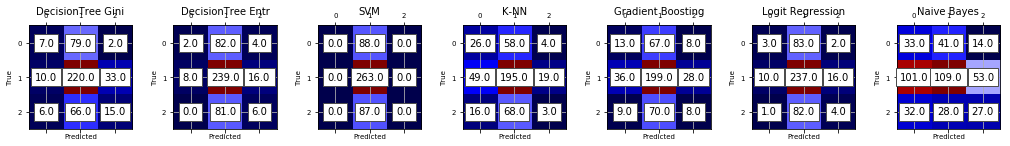

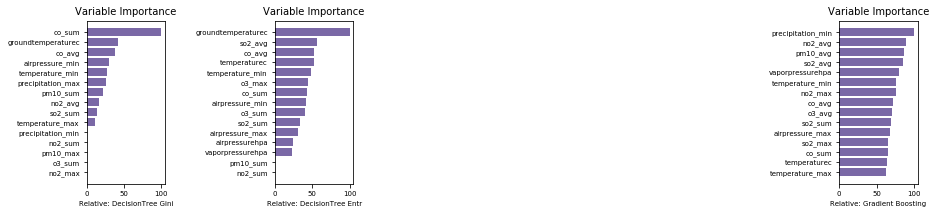

DecisionTree Gini Metrics
             precision    recall  f1-score   support

    class 0       0.30      0.08      0.13        88
    class 1       0.60      0.84      0.70       263
    class 2       0.30      0.17      0.22        87

avg / total       0.48      0.55      0.49       438

DecisionTree Entr Metrics
             precision    recall  f1-score   support

    class 0       0.20      0.02      0.04        88
    class 1       0.59      0.91      0.72       263
    class 2       0.23      0.07      0.11        87

avg / total       0.44      0.56      0.46       438

SVM Metrics
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00        88
    class 1       0.60      1.00      0.75       263
    class 2       0.00      0.00      0.00        87

avg / total       0.36      0.60      0.45       438

K-NN Metrics
             precision    recall  f1-score   support

    class 0       0.29      0.30      0.29        88
    class 1 

In [7]:
from sklearn.naive_bayes import GaussianNB

predictColumn = "pefcat"
predictColumn = "pef_zone"
if predictQuantile:
    predictColumn = "percent_group"

if ( 'pefcat' in df1.columns ):
    df1.pefcat = df1.pefcat.astype(int)
    df1=df1.drop('pefcat', axis=1)

cls = [# Comment/uncomment out any classfiers according to your need 
       # DO NOT CHANGE
        "DecisionTree Gini" , tree.DecisionTreeClassifier(max_depth=4, criterion="gini"),
        "DecisionTree Entr" , tree.DecisionTreeClassifier(max_depth=4, criterion="entropy"), 
        "SVM"               , sklearn.svm.SVC(kernel="linear"), 
#        "SVM1"              , SVC(kernel="rbf", C=10**3),
        "K-NN"              , sklearn.neighbors.KNeighborsClassifier(),
        "Gradient Boosting" , sklearn.ensemble.RandomForestClassifier(),
        "Logit Regression"  , sklearn.linear_model.LogisticRegression(),
#        "Neural NW"         , MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25, 10), random_state=1),
        "Naive Bayes"       , GaussianNB()
];

y = df1[predictColumn]
X = df1.drop(predictColumn, axis=1)
a = Classify(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=True)
ik = 0
y_preds=[]
clsNames=[]

for i in cls:
    if type(i) is str:
        clsNames.append(i)
        y_pred = a[4][i]
        y_preds.append(y_pred)
        target_names = ['class 0', 'class 1', 'class 2']
        print(i + ' Metrics')
        y.replace(to_replace="R", value=0, inplace=True, limit=None, regex=False, method='pad', axis=None)
        y.replace(to_replace="Y", value=1, inplace=True, limit=None, regex=False, method='pad', axis=None)
        y.replace(to_replace="G", value=2, inplace=True, limit=None, regex=False, method='pad', axis=None)
        print(classification_report(y, y_pred, target_names=target_names))


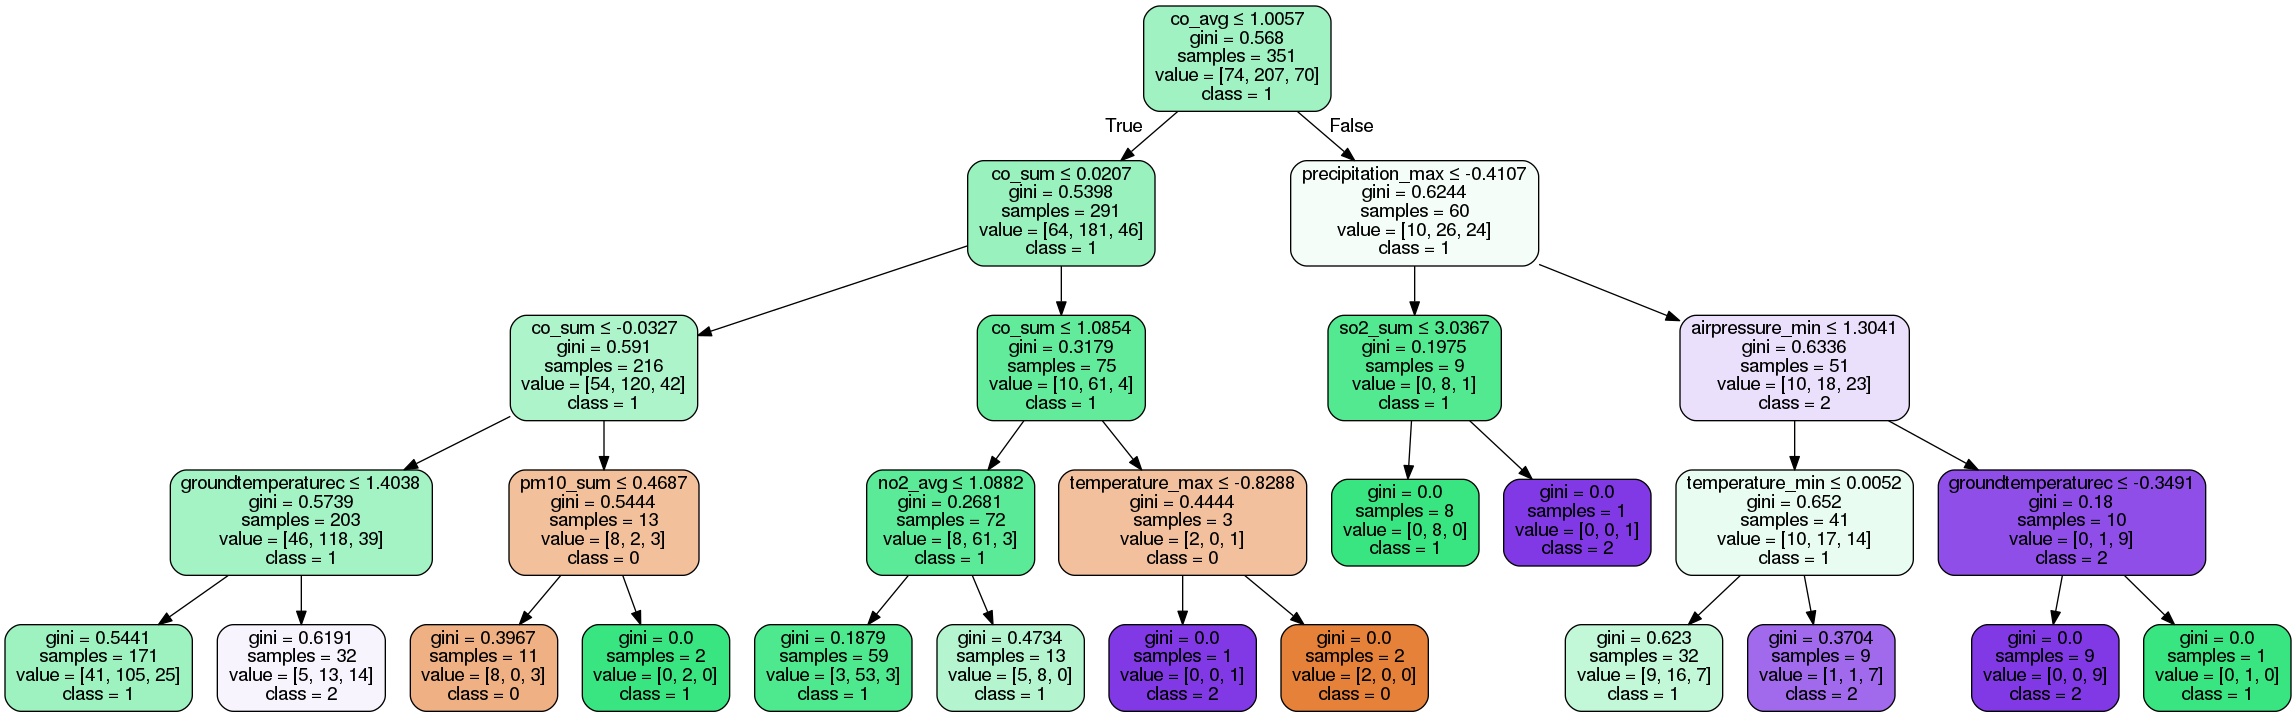

In [8]:
#(X1,y1,ra,cls) = Classify1(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=False)
DrawDecisionTree(X,y, cls[1])


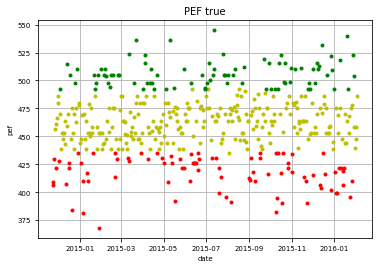

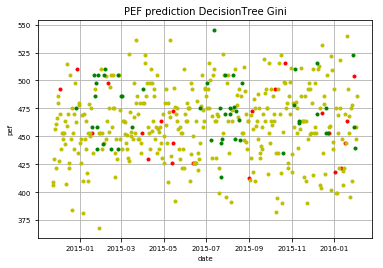

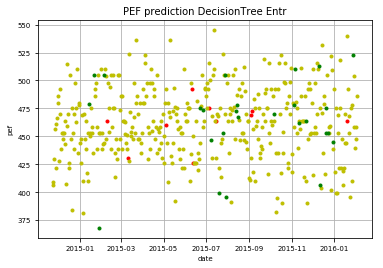

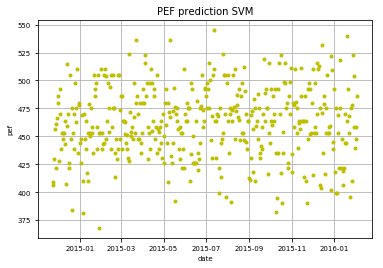

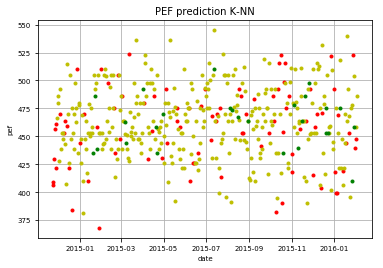

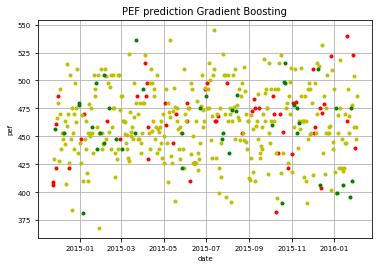

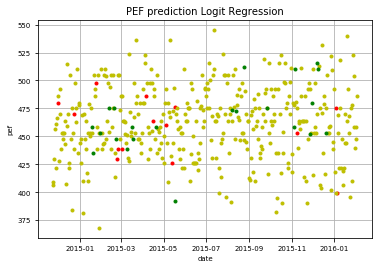

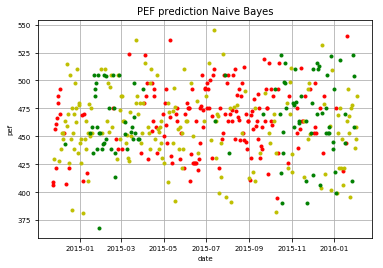

In [9]:
import matplotlib.pyplot as plt

#print(size(pefcol.values))
#print(size(y))
#print(y_pred)

plt.plot(pefcol.index[y == 0],pefcol.values[y == 0],'r.',pefcol.index[y == 1],pefcol.values[y == 1],'y.',pefcol.index[y == 2],pefcol.values[y == 2],'g.')

plt.xlabel('date')
plt.ylabel('pef')
plt.title('PEF true')
plt.grid(True)
plt.show()

i=0

for ypredicted in y_preds:
        plt.plot(pefcol.index[ypredicted == 0],pefcol.values[ypredicted == 0],'r.',pefcol.index[ypredicted == 1],pefcol.values[ypredicted == 1],'y.',pefcol.index[ypredicted == 2],pefcol.values[ypredicted == 2],'g.')

        plt.xlabel('date')
        plt.ylabel('pef')
        plt.title('PEF prediction ' + clsNames[i])
        plt.grid(True)
        plt.show()
        i+=1
